In [1]:
#Import the packages

import numpy as np
import pandas as pd
from collections import Counter
import random
import statistics as stat
#from scipy import stats
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


### Assignment #1: Question 1

In [2]:
#importing data from Excel as a numpy array
testData = pd.read_csv("knn-dataset/testData.csv",sep=',',header=None).values

testLabels = pd.read_csv("knn-dataset/testLabels.csv",sep=',',header=None).values

trainData = np.zeros([1000,64])
trainLabels = np.zeros([1000,1])

trainData[0:100] = pd.read_csv("knn-dataset/trainData1.csv",sep=',',header=None).values
trainData[100:200] = pd.read_csv("knn-dataset/trainData2.csv",sep=',',header=None).values
trainData[200:300] = pd.read_csv("knn-dataset/trainData3.csv",sep=',',header=None).values
trainData[300:400] = pd.read_csv("knn-dataset/trainData4.csv",sep=',',header=None).values
trainData[400:500] = pd.read_csv("knn-dataset/trainData5.csv",sep=',',header=None).values
trainData[500:600] = pd.read_csv("knn-dataset/trainData6.csv",sep=',',header=None).values
trainData[600:700] = pd.read_csv("knn-dataset/trainData7.csv",sep=',',header=None).values
trainData[700:800] = pd.read_csv("knn-dataset/trainData8.csv",sep=',',header=None).values
trainData[800:900] = pd.read_csv("knn-dataset/trainData9.csv",sep=',',header=None).values
trainData[900:1000] = pd.read_csv("knn-dataset/trainData10.csv",sep=',',header=None).values

trainLabels[0:100] = pd.read_csv("knn-dataset/trainLabels1.csv",sep=',',header=None).values
trainLabels[100:200] = pd.read_csv("knn-dataset/trainLabels2.csv",sep=',',header=None).values
trainLabels[200:300] = pd.read_csv("knn-dataset/trainLabels3.csv",sep=',',header=None).values
trainLabels[300:400] = pd.read_csv("knn-dataset/trainLabels4.csv",sep=',',header=None).values
trainLabels[400:500] = pd.read_csv("knn-dataset/trainLabels5.csv",sep=',',header=None).values
trainLabels[500:600] = pd.read_csv("knn-dataset/trainLabels6.csv",sep=',',header=None).values
trainLabels[600:700] = pd.read_csv("knn-dataset/trainLabels7.csv",sep=',',header=None).values
trainLabels[700:800] = pd.read_csv("knn-dataset/trainLabels8.csv",sep=',',header=None).values
trainLabels[800:900] = pd.read_csv("knn-dataset/trainLabels9.csv",sep=',',header=None).values
trainLabels[900:1000] = pd.read_csv("knn-dataset/trainLabels10.csv",sep=',',header=None).values

In [3]:
#takes the distances of one sample w.r.t other samples and find the label of the sample 

def knn(k, trainingData, trainingLabels, testingData):
    
    distance = cdist(testingData, trainingData, 'euclidean')
    
    indexKnn = distance.argsort()[:,:k]  
    
    labelKnn = trainingLabels[indexKnn]
    labelKnn = np.reshape(labelKnn,(labelKnn.shape[0],labelKnn.shape[1]))
    
    testingLabels=np.zeros(len(labelKnn))
   
    for i in range(len(labelKnn)):
        if (Counter(labelKnn[i])[5] == Counter(labelKnn[i])[6]) :
            testingLabels[i] = random.choice([5,6])
        else:
            testingLabels[i] = stat.mode(labelKnn[i])
            #testingLabels[i] = stats.mode(labelKnn[i])[0]  

    testingLabels= np.array([testingLabels]).T
    
    return testingLabels

In [4]:
# Testing function

def test(k, trainingData, trainingLabels, testingData, testingLabels): 
    classifiedLabels = knn(k, trainingData, trainingLabels, testingData)
        
    accuracy_k = np.sum(np.equal(classifiedLabels, testingLabels)==True)/len(testingLabels)*100
    
    return accuracy_k

k*:  3
h:  [[6. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5.
  6. 6. 6. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5. 6. 6. 5. 6. 6. 5. 5. 5. 6.
  5. 6. 5. 6. 5. 6. 6. 5. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5. 6. 6. 6. 6. 5. 6.
  5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 6. 5.
  5. 5. 6. 6. 6. 5. 5. 5. 6. 5. 5. 5. 6. 5. 6. 5. 5. 5. 5. 6. 5. 5. 6. 6.
  5. 6. 6. 5. 6. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 5. 5. 5. 6. 5. 5. 5. 6. 5.
  6. 6. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 5. 6. 6. 5. 5. 5. 5. 5. 6. 6. 6. 6.
  5. 5. 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 6. 5.
  5. 6. 6. 6. 6. 5. 6. 5. 5. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5. 6. 5.
  5. 6. 5. 5. 6. 5. 6. 5. 5. 6. 5. 6. 6. 5. 5. 6. 5. 5. 6. 6. 5. 6. 5. 5.
  5. 6. 6. 6. 5. 6. 5. 6. 5. 5. 6. 5. 6. 5. 5. 5. 6. 6. 5. 5. 5. 6. 6. 6.
  5. 6. 5. 5. 5. 5. 5. 5. 6. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 6.
  6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 5. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5.
  6. 6. 5. 5. 6. 5. 5. 5. 5

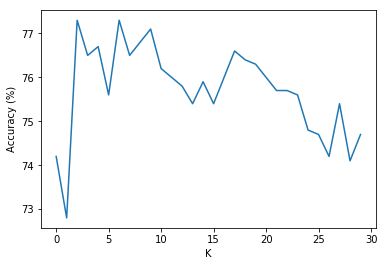

In [5]:
k=30
kPrime=10

accuracy_i = np.zeros(k)

for i in range(k):
    accuracy_ki = np.zeros(kPrime)
    
    for j in range(kPrime):
        trainData_ki = np.delete(trainData,np.arange(j*100,(j+1)*100),0)
        trainLabels_ki = np.delete(trainLabels,np.arange(j*100,(j+1)*100),0)
        
        h_ki = knn(i+1, trainData_ki, trainLabels_ki, trainData_ki)
        
        validData_ki = trainData[j*100:(j+1)*100]
        validLabels_ki = trainLabels[j*100:(j+1)*100]
        
        accuracy_ki[j] = test (i+1, trainData_ki, h_ki, validData_ki, validLabels_ki)
        
    accuracy_i [i] = np.average(accuracy_ki)

plt.plot(accuracy_i)
plt.xlabel('K')
plt.ylabel('Accuracy (%)');

kStar = np.argmax(accuracy_i)+1

h = knn(kStar, trainData, trainLabels, trainData)
accuracy = test (kStar, trainData, h, testData, testLabels)

print("k*: ", kStar)
print("h: ", np.transpose(h))
print("accuracy %: ", accuracy)


### Assignment #1: Question 2

In [6]:
testInput = pd.read_csv("regression-dataset/testInput.csv",sep=',',header=None).values

testTarget = pd.read_csv("regression-dataset/testTarget.csv",sep=',',header=None).values

trainInput = np.zeros([200,2])
trainTarget = np.zeros([200,1])

trainInput[0:20] = pd.read_csv("regression-dataset/trainInput1.csv",sep=',',header=None).values
trainInput[20:40] = pd.read_csv("regression-dataset/trainInput2.csv",sep=',',header=None).values
trainInput[40:60] = pd.read_csv("regression-dataset/trainInput3.csv",sep=',',header=None).values
trainInput[60:80] = pd.read_csv("regression-dataset/trainInput4.csv",sep=',',header=None).values
trainInput[80:100] = pd.read_csv("regression-dataset/trainInput5.csv",sep=',',header=None).values
trainInput[100:120] = pd.read_csv("regression-dataset/trainInput6.csv",sep=',',header=None).values
trainInput[120:140] = pd.read_csv("regression-dataset/trainInput7.csv",sep=',',header=None).values
trainInput[140:160] = pd.read_csv("regression-dataset/trainInput8.csv",sep=',',header=None).values
trainInput[160:180] = pd.read_csv("regression-dataset/trainInput9.csv",sep=',',header=None).values
trainInput[180:200] = pd.read_csv("regression-dataset/trainInput10.csv",sep=',',header=None).values

trainTarget[0:20] = pd.read_csv("regression-dataset/trainTarget1.csv",sep=',',header=None).values
trainTarget[20:40] = pd.read_csv("regression-dataset/trainTarget2.csv",sep=',',header=None).values
trainTarget[40:60] = pd.read_csv("regression-dataset/trainTarget3.csv",sep=',',header=None).values
trainTarget[60:80] = pd.read_csv("regression-dataset/trainTarget4.csv",sep=',',header=None).values
trainTarget[80:100] = pd.read_csv("regression-dataset/trainTarget5.csv",sep=',',header=None).values
trainTarget[100:120] = pd.read_csv("regression-dataset/trainTarget6.csv",sep=',',header=None).values
trainTarget[120:140] = pd.read_csv("regression-dataset/trainTarget7.csv",sep=',',header=None).values
trainTarget[140:160] = pd.read_csv("regression-dataset/trainTarget8.csv",sep=',',header=None).values
trainTarget[160:180] = pd.read_csv("regression-dataset/trainTarget9.csv",sep=',',header=None).values
trainTarget[180:200] = pd.read_csv("regression-dataset/trainTarget10.csv",sep=',',header=None).values


min error @ landa= 2.8


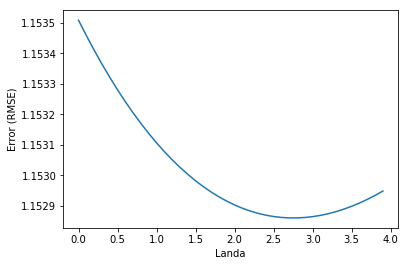

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

kPrime=10
trainInputBar=np.append(np.ones([len(trainInput),1]), trainInput, axis=1)

error = np.zeros(40)

landa=np.around(np.arange(0, 4, 0.1),1)

for i in range(40):
    
    landa_i = landa[i]
    error_i = np.zeros(kPrime)  
    
    for j in range(kPrime):
        trainInputBar_j = np.delete(trainInputBar,np.arange(j*20,(j+1)*20),0)
        trainTarget_j = np.delete(trainTarget,np.arange(j*20,(j+1)*20),0)
        
        A=np.zeros([trainInputBar_j.shape[1],trainInputBar_j.shape[1]])
        
        #forming A Matrix
        for k in range(len(trainInputBar_j)):
            A += np.dot(np.array([trainInputBar_j[k]]).T, np.array([trainInputBar_j[k]]))
        
        #forming b Matrix
        b=np.zeros([trainInputBar_j.shape[1], 1])
        
        for l in range(len(trainTarget_j)):
            b += trainTarget_j[l] * np.array([trainInputBar_j[l]]).T
        
        w_j = np.dot(np.linalg.inv(A + landa_i/2*np.identity(trainInputBar_j.shape[1])), b)
        
        yHat_j = np.dot(w_j.T, trainInputBar[j*20:(j+1)*20].T) 
        
        error_i[j] = rmse(yHat_j, trainTarget[j*20:(j+1)*20].T)
    
    error [i] = np.average(error_i)
    
plt.plot(landa, error)
plt.xlabel('Landa')
plt.ylabel('Error (RMSE)');

print("min error @ landa=", landa[np.argmin(error)])

In [59]:
landaMin=landa[np.argmin(error)]

testInputBar=np.append(np.ones([len(testInput),1]), testInput, axis=1)

A=np.zeros([testInputBar.shape[1],testInputBar.shape[1]])
        
#forming A Matrix
for i in range(len(testInputBar)):
    A += np.dot(np.array([testInputBar[i]]).T, np.array([testInputBar[i]]))
        
#forming b Matrix
b=np.zeros([testInputBar.shape[1], 1])
        
for j in range(len(testTarget)):
    b += testTarget[j] * np.array([testInputBar[j]]).T
        
w = np.dot(np.linalg.inv(A + landaMin/2*np.identity(testInputBar.shape[1])), b)
        
yHat = np.dot(w.T, testInputBar.T) 
        
error = rmse(yHat, testTarget.T)

print("test data RMSE @ minimum landa (%)=", error)

test data error @ minimum landa= 1.1681018713685811


### Assignment #1: Question 3.a
\begin{equation*}
L (w,b)=\sum_{n=1}^{m}{r_n\left(y_n-wx_n+b\right)^2} \\
\frac{\partial L}{\partial b}=\sum_{n=1}^{m}2r_n\left(y_n-wx_n+b\right)=0 \\
Eq.\left(1\right):-b\sum r_n+w\sum{r_nx_n}=\sum{r_ny_n} \\
\frac{\partial L}{\partial w}=\sum_{n=1}^{m}{-2r_n}x_n\left(y_n-wx_n+b\right)=0 \\
Eq.\left(2\right):-b\sum{r_nx_n}+w\sum{r_nx_n^2}=\sum{r_nx_ny_n} \\
\end{equation*}
        
Combining Eq.1 & Eq.2 we have; 
\begin{equation*}
\left[\begin{matrix}-\sum_{n=1}^{m}r_n&\sum_{n=1}^{m}{r_nx_n}\\-\sum_{n=1}^{m}{r_nx_n}&\sum_{n=1}^{m}{r_nx_n^2}\\\end{matrix}\right]\left(\begin{matrix}b\\w\\\end{matrix}\right)=\left[\begin{matrix}\sum_{n=1}^{m}{r_ny_n}\\\sum_{n=1}^{m}{r_nx_ny_n}\\\end{matrix}\right]\\
\end{equation*}

We can write above equation in the following shorthand form;
\begin{equation*}
A\underline{w}=\underline{b}\\
\end{equation*}

where; $$ \ A=\left[\begin{matrix}-\sum_{n=1}^{m}r_n&\sum_{n=1}^{m}{r_nx_n}\\-\sum_{n=1}^{m}{r_nx_n}&\sum_{n=1}^{m}{r_nx_n^2}\\\end{matrix}\right];\ 
\underline{w}=\left(\begin{matrix}b\\w\\\end{matrix}\right);\ \ 
\underline{b}=\left[\begin{matrix}\sum_{n=1}^{m}{r_ny_n}\\\sum_{n=1}^{m}{r_nx_ny_n}\\\end{matrix}\right]
$$

### Assignment #1: Question 3.b
Given; 
\begin{equation*}
Pr\left(\textbf{y}\middle|\textbf{X},w,b,\sigma_n^2\right)=\prod_{n=1}^{N}\frac{1}{\sqrt{2\pi}\sigma_n}e^{-\frac{\left(y_n-wx_n+b\right)^2}{2\sigma_n^2}}\\
\end{equation*}
the best $w$ and $b$ maximizing the likelihood above can be found solving the following optimization problem. 

\begin{equation*}
w^\ast,\ b^\ast\ \ ={argmax}_{w,b}Pr\left(\textbf{y}\middle|\textbf{X},w,b,\sigma_n^2\right)\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ ={argmax}_{w,b}\prod_{n=1}^{N}\frac{1}{\sigma_n}e^{-\frac{\left(y_n-wx_n+b\right)^2}{2\sigma_n^2}}\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ={argmax}_{w,b}\sum_{n}{log(\frac{1}{\sigma_n}e^{-\frac{\left(y_n-wx_n+b\right)^2}{2\sigma_n^2}})}\\
\ \ \ \ \ \ \ \ \ \ \ \ \ ={argmax}_{w,b}(\ \sum_{n}{log(\frac{1}{\sigma_n})}+\sum_{n}{log(e^{-\frac{\left(y_n-wx_n+b\right)^2}{2\sigma_n^2}})})\\
\ \ \ \ \ \ \ \ \ \ \ \ \ ={argmax}_{w,b}\sum_{n}{-\frac{\left(y_n-wx_n+b\right)^2}{\sigma_n^2}}\\
\ \ \ \ \ \ \ \ \ \ \ \ \ ={argmin}_{w,b}\sum_{n}{r}_n\left(y_n-wx_n+b\right)^2\\
\end{equation*}

where; $ r_n=\frac{1}{\sigma_n^2} $

We can go through the equation in reverse order to conclude that $L(w,b)$ is equivalent to the negative log-likelihood for linear regression where
each data point may have a different Gaussian measurement noise.


In [1]:
import numpy as np

In [4]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
A=np.array([1,2,3])

In [7]:
A.mean()

2.0